<a href="https://colab.research.google.com/github/Limm-jk/MachineLearning_ex_UsingColab/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5, ) # 폰트지정

import missingno as msno

# import warnings #버전관리를 위한 warning표시 제거
# warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
from google.colab import drive #드라이브 연동
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
train = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/titanic/train.csv")
test = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/titanic/test.csv")
sample = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/titanic/sample_submission.csv")

train.shape, test.shape, sample.shape

((891, 12), (418, 11), (418, 2))

In [4]:
train.columns #(id, 생존여부, 호실클래스, 이름, 성별, 나이, 함께탑승한 형제자매 배우자, 함께 탑승한 부모자녀, 티켓넘버, 요금, 객실넘버, 탑승항구)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
train.describe() #정수형 통계

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.isnull().sum()#결측치 체크 개많네;; 각각 int옵젝옵젝

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

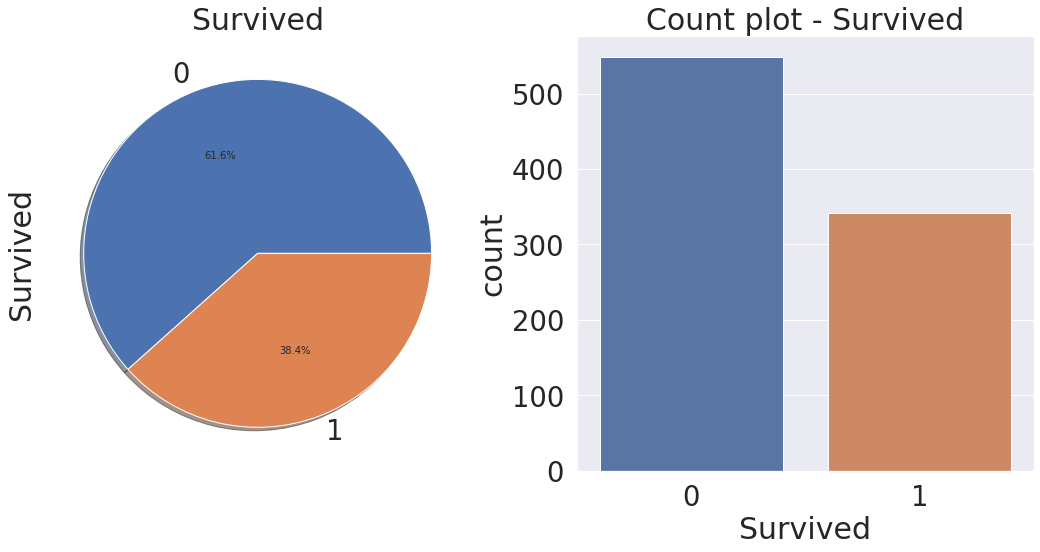

In [19]:
#타겟컬럼의 분포를 체크. 0과 1로 나오는 통계일수록 이 분포가 중요
f, ax = plt.subplots(1, 2, figsize=(18, 8)) #여러 그래프를 한번에 보기위해 사용 ( 총슬릇, 슬릇내 낱개 그래프, 그래프 사이즈 조절)
train['Survived'].value_counts().plot.pie(explode = [0,0], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title("Survived")
ax[0].set_ylabel("")
sns.countplot('Survived', data = train, ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()
# 꽤나 balenced한 편!

In [23]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


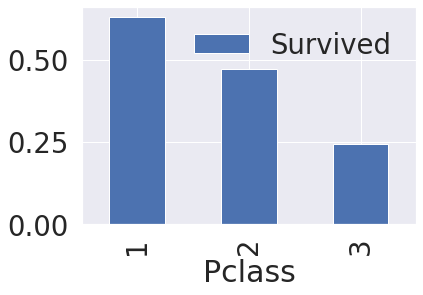

In [30]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()#생존율
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

In [25]:
pd.crosstab(train['Pclass'],train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


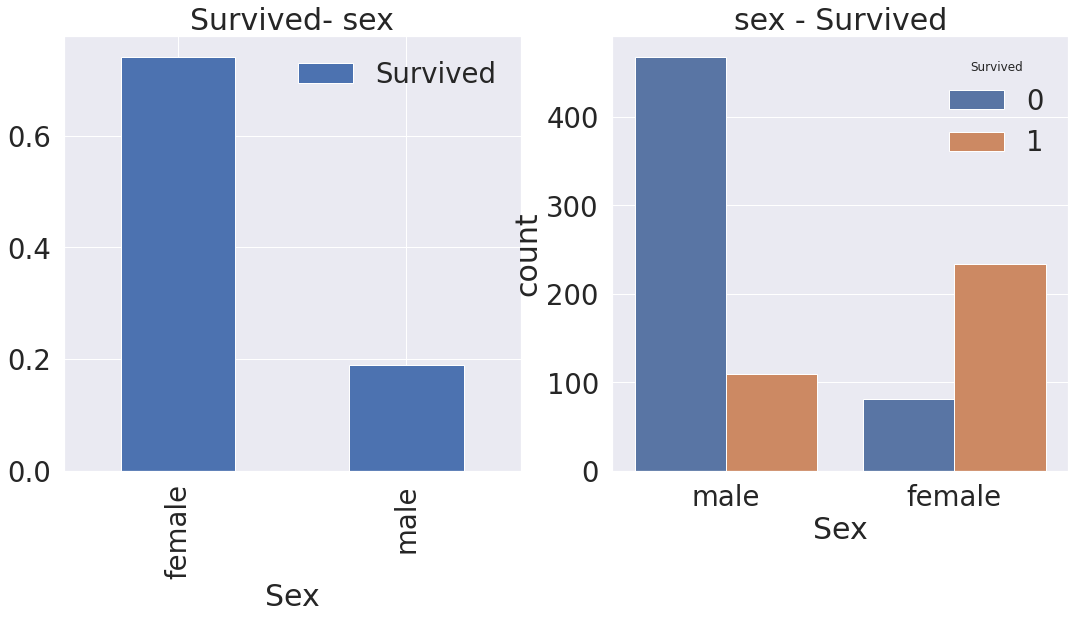

In [37]:
#성별 분석
f, ax = plt.subplots(1, 2, figsize=(18, 8)) #여러 그래프를 한번에 보기위해 사용 ( 총슬릇, 슬릇내 낱개 그래프, 그래프 사이즈 조절)
train[['Sex','Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
ax[0].set_title("Survived- sex")
# ax[0].set_ylabel("")
sns.countplot('Sex', hue = 'Survived', data = train, ax = ax[1])
ax[1].set_title('sex - Survived')

plt.show()
#여자가 잘사네

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


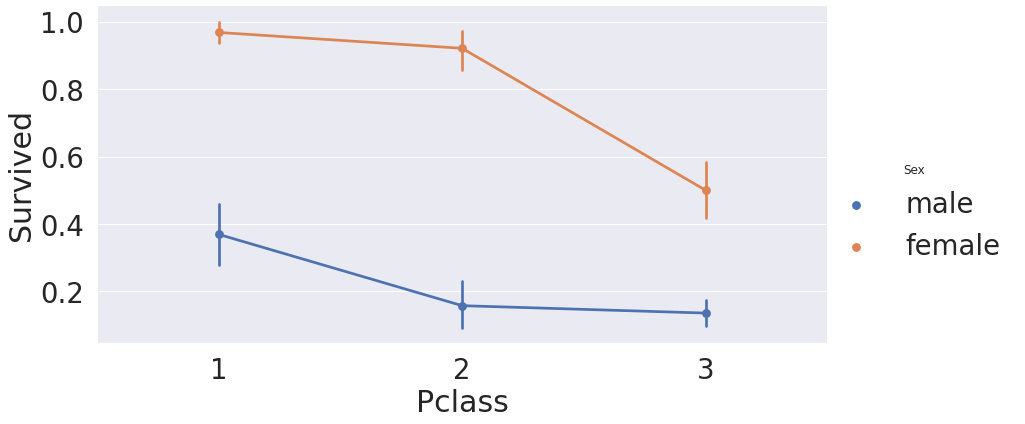

In [41]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, size =6, aspect = 2) # 두 정보를 합쳐서 보자

In [45]:
# 나이를 분석
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

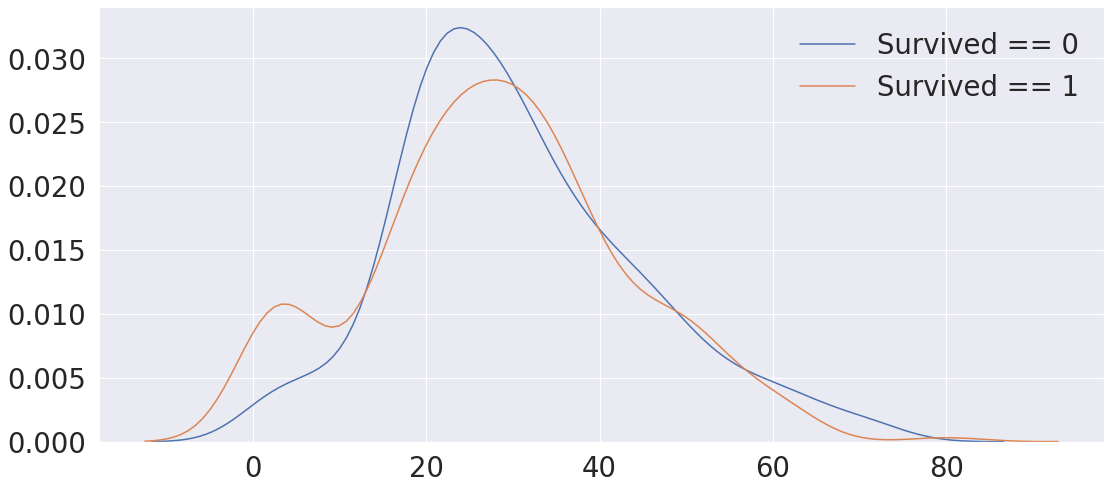

In [55]:
f, ax = plt.subplots(1, 1, figsize=(18, 8)) #여러 그래프를 한번에 보기위해 사용 ( 총슬릇, 슬릇내 낱개 그래프, 그래프 사이즈 조절)
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax = ax)
sns.kdeplot(train[train['Survived'] == 1]['Age'], ax = ax)
plt.legend(['Survived == 0','Survived == 1'])

plt.show()

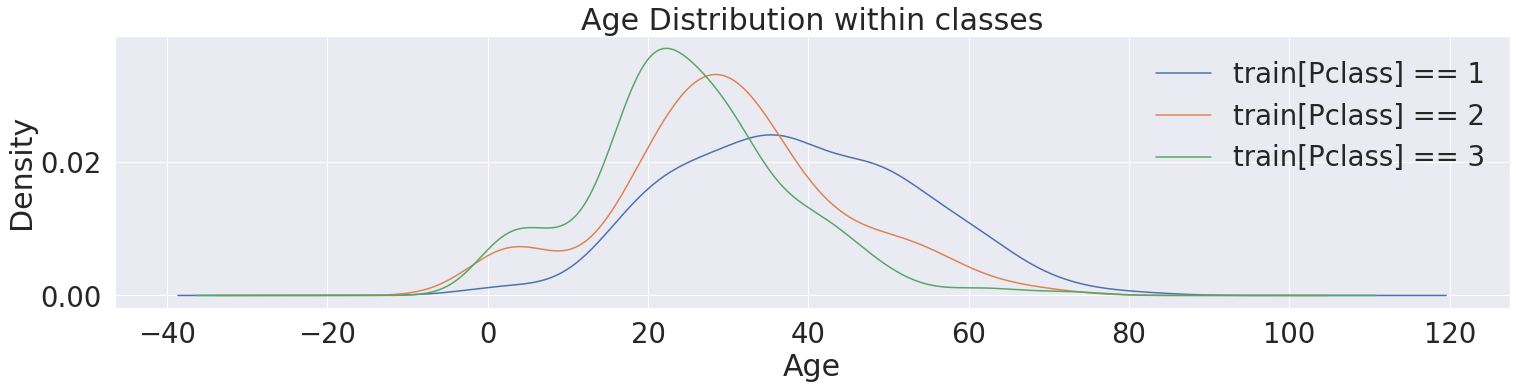

In [61]:
plt.figure(figsize=(25,5))
train['Age'][train['Pclass'] == 1].plot(kind = 'kde')
train['Age'][train['Pclass'] == 2].plot(kind = 'kde')
train['Age'][train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['train[Pclass] == 1', 'train[Pclass] == 2', 'train[Pclass] == 3'])


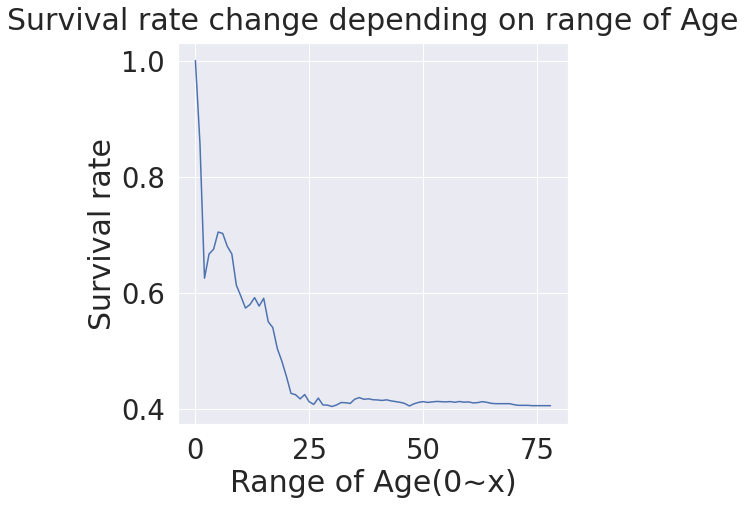

In [63]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()